# Visualize Alpine-3D downscalled meteorology

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from palettable.colorbrewer.diverging import RdBu_11
from palettable.colorbrewer.sequential import *

In [2]:
# Load Alpine-3D
ds = xr.open_dataset("../output/grids/a3d_grids.nc")

# Load Alpine-3D topography 
# dem = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem = xr.DataArray(dem, coords=[ds['northing'], ds['easting']], dims=['northing', 'easting'])

In [3]:
# Trim grids
n_trim = 15

ds = ds.isel(easting=slice(n_trim, -n_trim))
ds = ds.isel(northing=slice(n_trim, -n_trim))

dem = dem.isel(easting=slice(n_trim, -n_trim))
dem = dem.isel(northing=slice(n_trim, -n_trim))

# Organize data for plotting

In [4]:
# Get easting and northing
x_snowpack = ds['easting'] / 1000
y_snowpack = ds['northing'] / 1000

# Alpine-3D variable

# # Delta SWE
A3D_var = ds['swe'].isel(time=-1) - ds['swe'].isel(time=0); A3D_var *= 1000; colormap=YlGnBu_9.mpl_colormap

# # Drifting snow frequency 
# erosion = ds['ERODEDMASS'] > 0
# A3D_var = 100 * erosion.sum(dim='time') / len(ds['time']); colormap=Purples_9.mpl_colormap

# # Surface temperature
# A3D_var = ds['ts'].mean(dim='time') - 273.15; colormap=YlOrRd_9.mpl_colormap

# Precipitation
# A3D_var = ds['pr'].sum(dim='time'); colormap=YlGnBu_9.mpl_colormap

# Wind Speed
# A3D_var = ds['ws'].mean(dim='time'); colormap=PuBuGn_9.mpl_colormap

# # Bulk snow density
# A3D_var = ds['snow_density'].isel(time=-1); colormap=PuBuGn_9.mpl_colormap

# Change in snow height
# snow_height = ds['swe'] * 1000 / ds['snow_density']
# A3D_var = snow_height.isel(time=-1) - snow_height.isel(time=0); colormap=RdBu_11.mpl_colormap


# Plot variable

<xarray.DataArray 'swe' ()>
array(340.25528, dtype=float32)


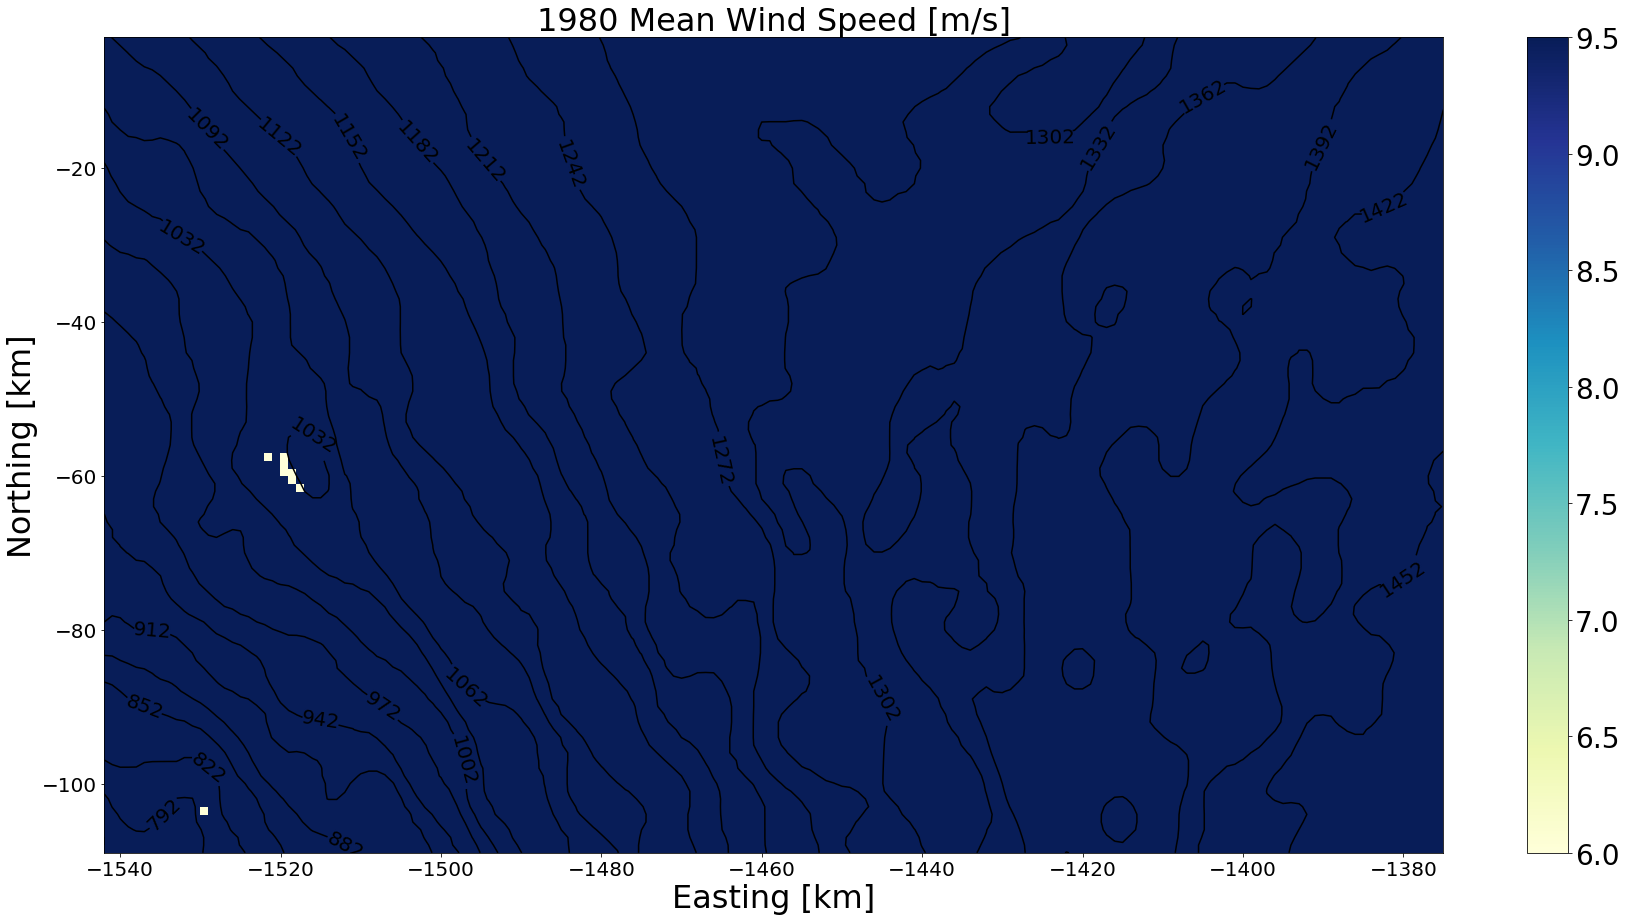

In [5]:
# Create figure
plt.figure(figsize=(30,15))

# DEM
contour_levels = np.linspace(dem.min(), dem.max(), 25)
contour = plt.contour(x_snowpack.values, y_snowpack.values, dem, contour_levels, linestyles='solid', colors='black')
plt.clabel(contour, fontsize=20, fmt = '%.0f', inline = True)

# Alpine-3D variable
# plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap = colormap, vmin=-np.abs(A3D_var).max(), vmax=np.abs(A3D_var).max())
# plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap=colormap, vmin=A3D_var.min(), vmax=A3D_var.max())
# plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap=colormap, vmin=0, vmax=450)
plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap=colormap, vmin=6, vmax=9.5)
plt.title('1980 Mean Wind Speed [m/s]', fontsize=32)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Easting [km]", fontsize=32)
plt.ylabel("Northing [km]", fontsize=32)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=28)
print(A3D_var.mean())
plt.savefig("A3D_meteorology.pdf", dpi=100)

# Plot a transect

<xarray.DataArray 'northing' ()>
array(-80000., dtype=float32)
Coordinates:
    northing  float32 -80000.0
Attributes:
    standard_name:  projection_y_coordinate
    units:          m
    axis:           Y


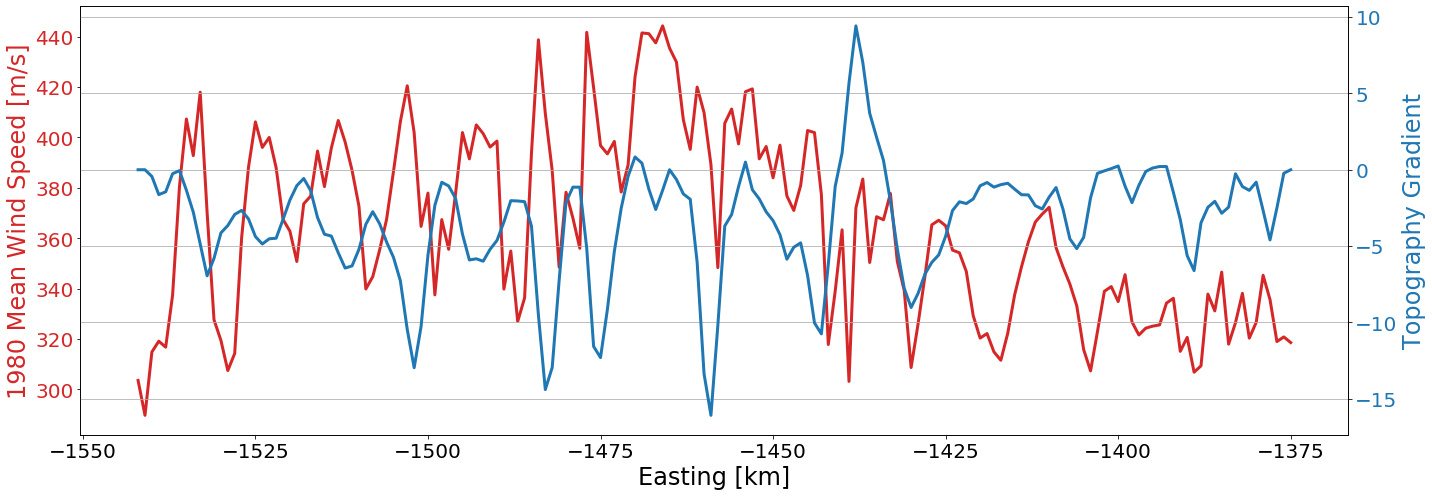

In [6]:
# Create figure
n_row = 29
print(A3D_var['northing'][n_row])
fig, ax1 = plt.subplots(figsize=(20,7))

# Plot wind speed
color = 'tab:red'
ax1.set_xlabel('Easting [km]', fontsize=24)
ax1.set_ylabel('1980 Mean Wind Speed [m/s]', color=color, fontsize=24)
ax1.plot(x_snowpack, A3D_var[n_row,:], color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)
ax1.tick_params(axis='x', labelsize=20)


# Plot topography
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Topography Gradient', color=color, fontsize=24)
ax2.plot(x_snowpack, -np.gradient(dem[n_row,:]), color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

# Settings
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.savefig("A3D_transect.pdf", dpi=100)
# plt.show()

<xarray.DataArray 'northing' ()>
array(-73000., dtype=float32)
Coordinates:
    northing  float32 -73000.0
Attributes:
    standard_name:  projection_y_coordinate
    units:          m
    axis:           Y


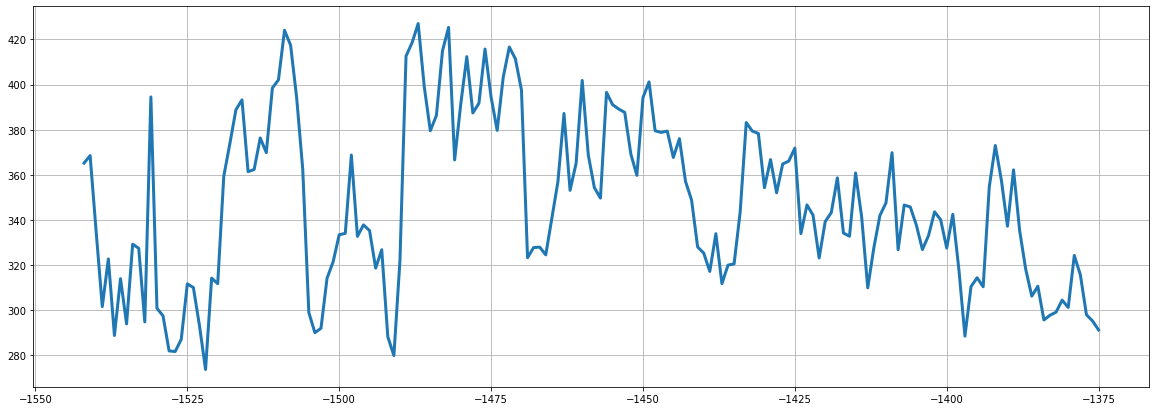

In [7]:
# Create figure
n_row = 36
print(A3D_var['northing'][n_row])
fig, ax1 = plt.subplots(figsize=(20,7))

# Plot DMB
plt.plot(x_snowpack, A3D_var[n_row,:], linewidth=3)
plt.grid()

# DEM comparison

In [8]:
# Load data sets
dem_high_res = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem_low_res = np.flipud(np.loadtxt("../input/modified_surface_grids/dem.asc", skiprows=6))

# Define colorbar
colormap=RdBu_11.mpl_colormap

# Define colorbar limits
high_res_max = dem_high_res.max()
high_res_min = dem_high_res.min()
low_res_max = dem_low_res.max()
low_res_min = dem_low_res.min()

maxima = np.maximum(high_res_max, low_res_max)
minima = np.minimum(high_res_min, low_res_min)

# Plot DEM (High Resolution)

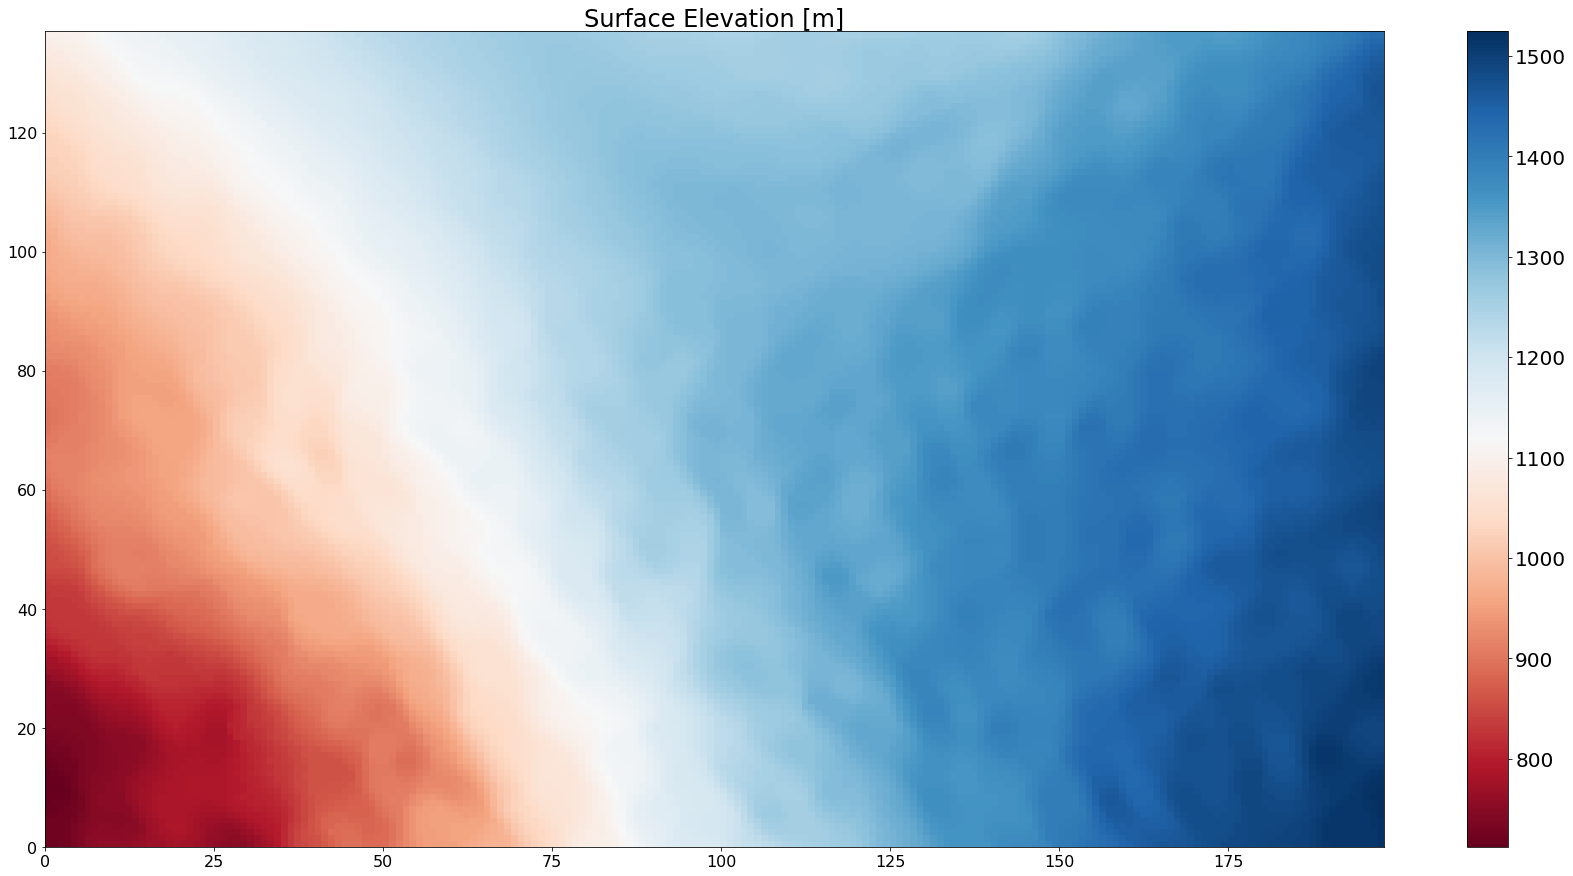

In [9]:
# Create figure
plt.figure(figsize=(30,15))
plt.pcolor(dem_high_res, cmap=colormap, vmin=minima, vmax=maxima)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Surface Elevation [m]', fontsize=24)
plt.savefig("A3D_meteorology.pdf", dpi=100)

# Plot DEM (Lower Resolution)


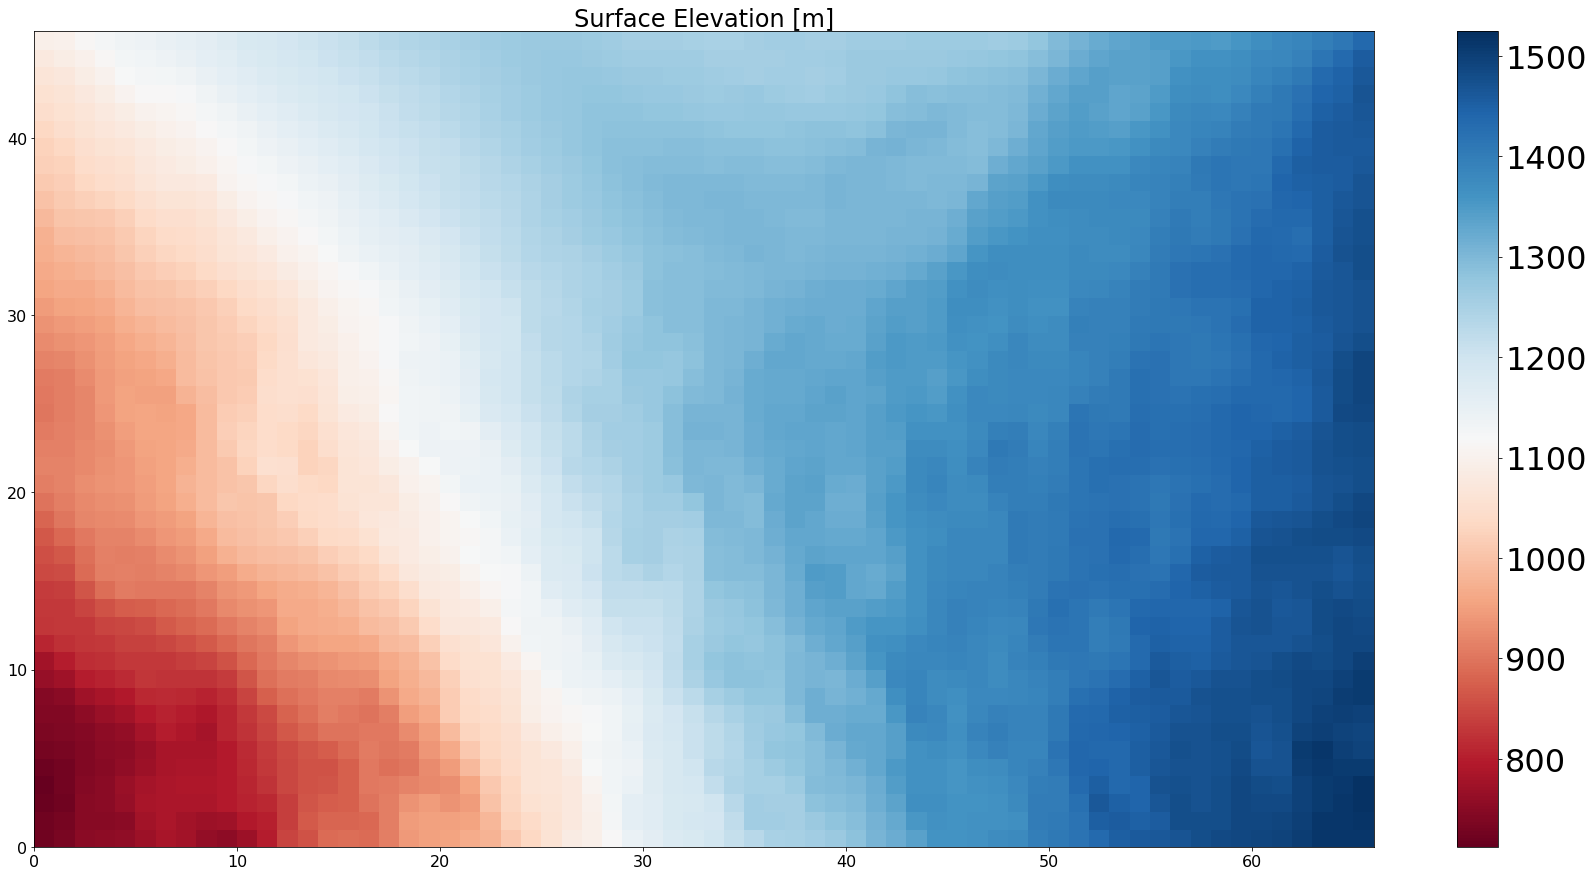

In [14]:
# Create figure
plt.figure(figsize=(30,15))
plt.pcolor(dem_low_res, cmap=colormap, vmin=minima, vmax=maxima)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=32)
plt.title('Surface Elevation [m]', fontsize=24)
plt.savefig("A3D_meteorology.pdf", dpi=100)

In [11]:
ds.close()